In [32]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [33]:
df_original = pd.read_csv('Desktop/Thinkful/states_all.csv')
df_original.head(2)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712


In [34]:
# Make copy of dataframe
df = df_original.copy()
# Create a list of all columns we want to work on.
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]
# Fill in all missing values from the column with the average of the same column

for i in fill_list:
    df[i].fillna(df[i].mean(), inplace = True)

## 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?


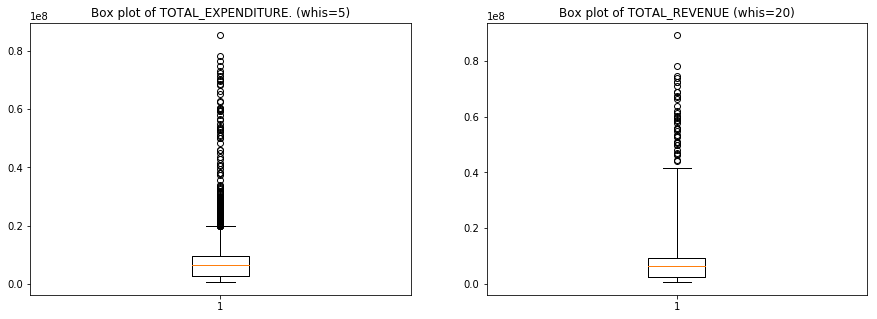

In [35]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_EXPENDITURE. (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(df["TOTAL_REVENUE"], whis=5)
plt.title("Box plot of TOTAL_REVENUE (whis=20)")

plt.show()

Yes, both variables have outlier values

Let's try the "Tukey's method"

In [36]:
q75, q25 = np.percentile(df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["TOTAL_REVENUE"] > max_val) 
                      | (df["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 121
The score threshold is: 2.5
Number of outliers is: 93
The score threshold is: 3.0
Number of outliers is: 66
The score threshold is: 3.5
Number of outliers is: 51
The score threshold is: 4.0
Number of outliers is: 45
The score threshold is: 4.5
Number of outliers is: 42


In [37]:
q75, q25 = np.percentile(df["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["TOTAL_EXPENDITURE"] > max_val) 
                      | (df["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))


The score threshold is: 1.0
Number of outliers is: 190
The score threshold is: 1.5
Number of outliers is: 148
The score threshold is: 2.0
Number of outliers is: 113
The score threshold is: 2.5
Number of outliers is: 91
The score threshold is: 3.0
Number of outliers is: 61
The score threshold is: 3.5
Number of outliers is: 52
The score threshold is: 4.0
Number of outliers is: 49
The score threshold is: 4.5
Number of outliers is: 43


The statistical method shows us outliers as well.

## 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.


We will use winsorization to eliminate the outliers. We apply one-way winsorization to the highest end of the value distribution. We set the values of the outliers to the value of the 90th percentile.

In [38]:
from scipy.stats.mstats import winsorize
 
TOTAL_REVENUE_winsorized = winsorize(df["TOTAL_REVENUE"], (0, 0.10))
TOTAL_EXPENDITURE_winsorized = winsorize(df["TOTAL_EXPENDITURE"], (0, 0.10))

Let's look at boxplot to cheak whether the outliers have been eliminated or not.

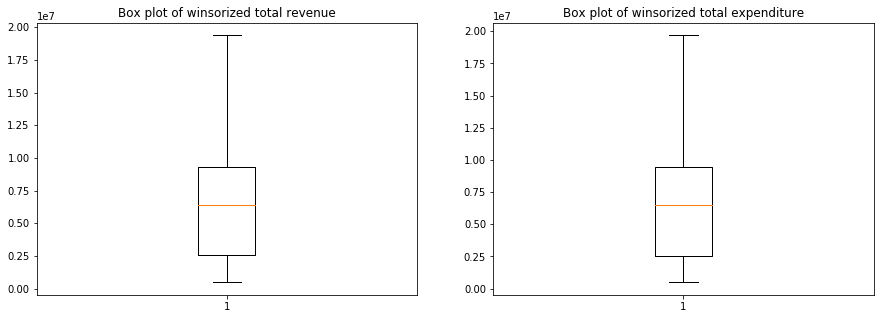

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(TOTAL_REVENUE_winsorized, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(TOTAL_EXPENDITURE_winsorized, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

Now the "turkey method"

In [46]:
q75, q25 = np.percentile(TOTAL_REVENUE_winsorized, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((TOTAL_REVENUE_winsorized > max_val) 
                      | (TOTAL_REVENUE_winsorized < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [47]:
q75, q25 = np.percentile(TOTAL_EXPENDITURE_winsorized, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((TOTAL_EXPENDITURE_winsorized > max_val) 
                      | (TOTAL_EXPENDITURE_winsorized < min_val))[0]))
    ))


The score threshold is: 1.0
Number of outliers is: 190
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


## 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.


In [48]:
rev_expend = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

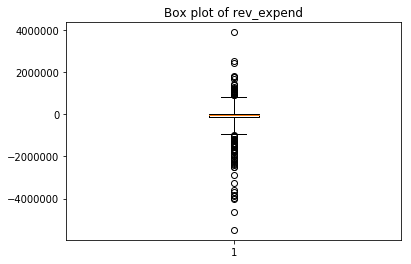

In [49]:
plt.boxplot(rev_expend, whis = 5)
plt.title("Box plot of rev_expend")
plt.show()

In [50]:
q75, q25 = np.percentile(rev_expend, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((rev_expend > max_val) 
                      | (rev_expend < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 358
The score threshold is: 1.5
Number of outliers is: 275
The score threshold is: 2.0
Number of outliers is: 231
The score threshold is: 2.5
Number of outliers is: 182
The score threshold is: 3.0
Number of outliers is: 147
The score threshold is: 3.5
Number of outliers is: 124
The score threshold is: 4.0
Number of outliers is: 111
The score threshold is: 4.5
Number of outliers is: 97


In [52]:
rev_expend_winsorized = winsorize(rev_expend, (0.10, 0.10))

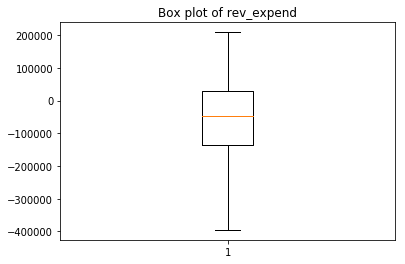

In [54]:
plt.boxplot(rev_expend_winsorized, whis = 10)
plt.title("Box plot of rev_expend")
plt.show()

In [55]:
q75, q25 = np.percentile(rev_expend_winsorized, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((rev_expend_winsorized > max_val) 
                      | (rev_expend_winsorized < min_val))[0]))
    ))


The score threshold is: 1.0
Number of outliers is: 358
The score threshold is: 1.5
Number of outliers is: 157
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


It seems that the outliers are eliminated.

## 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.


In [56]:
rev_expend_win = TOTAL_REVENUE_winsorized - TOTAL_EXPENDITURE_winsorized

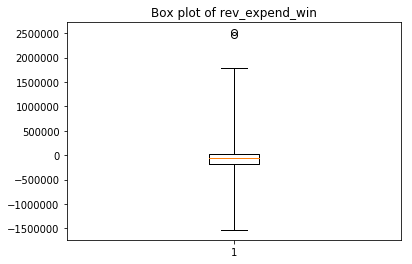

In [59]:
plt.boxplot(rev_expend_win, whis = 10)
plt.title('Box plot of rev_expend_win')
plt.show()

Yes, we have outkiers. We will get rid of them 

In [62]:
rev_expend_win_winsorize = winsorize(rev_expend_win, (0.10, 0.10))

In [63]:
q75, q25 = np.percentile(rev_expend_win_winsorize, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((rev_expend_win_winsorize > max_val) 
                      | (rev_expend_win_winsorize < min_val))[0]))
    ))


The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


## 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?


In [64]:
rev_expend  rev_expend_winsorized rev_expend_win_winsorize


-66300.34795785852

In [67]:
pd.DataFrame({'rev_expend': rev_expend, 'rev_expend_winsorized': rev_expend_winsorized, 'rev_expend_win_winsorize':rev_expend_win_winsorize}).describe()

,rev_expend,rev_expend_winsorized,rev_expend_win_winsorize
count,1.492000e+03,1492.000000,1492.000000
mean,-1.045990e+05,-66300.347958,-74987.851979
std,5.310770e+05,172254.236587,149006.815983
min,-5.487742e+06,-395270.000000,-306344.000000
25%,-1.360070e+05,-136007.000000,-181183.750000
50%,-4.849350e+04,-48493.500000,-65651.000000
75%,2.965425e+04,29654.250000,20473.500000
max,3.897129e+06,208528.000000,165510.000000


I see a huge difference. The mean has changed. But Std became less. 

## 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

If we are talking about budget, I think the first method (get rid of outliers first, then subtract TOTAL_EXPENDITURE from TOTAL_REVENUE) is better. Because first, we get rid of possible errors and anomalies. And our result would be closer to reality. Altho, both methods can be useful.